In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hospitals = pd.read_csv('hospitals_yrajes2.csv')

In [3]:
hospitals.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date,Location
0,370173,CLAREMORE INDIAN HOSPITAL,101 SOUTH MOORE AVE,CLAREMORE,OK,74017,ROGERS,(918) 341-8430,Colonoscopy care,OP_29,Endoscopy/polyp surveillance: appropriate foll...,Not Available,Not Available,5 - Results are not available for this reporti...,01/01/2017,12/31/2017,"101 SOUTH MOORE AVE CLAREMORE, OK 74017 (36.31..."
1,390150,WASHINGTON HEALTH SYSTEM GREENE,350 BONAR AVENUE,WAYNESBURG,PA,15370,GREENE,(724) 627-2602,Sepsis Care,SEP_1,Appropriate care for severe sepsis and septic ...,68,22,NaN,04/01/2017,03/31/2018,"350 BONAR AVENUE WAYNESBURG, PA 15370 (39.9006..."
2,210002,UNIVERSITY OF MARYLAND MEDICAL CENTER,22 SOUTH GREENE STREET,BALTIMORE,MD,21201,BALTIMORE CITY,(410) 328-8667,Pregnancy and Delivery Care,PC_01,Elective Delivery,0,63,2 - Data submitted were based on a sample of c...,04/01/2017,03/31/2018,"22 SOUTH GREENE STREET BALTIMORE, MD 21201 (39..."
3,370233,PINNACLE SPECIALTY HOSPITAL,"2408 EAST 81ST STREET, SUITE 600",TULSA,OK,74137,TULSA,(918) 392-2780,Cataract surgery outcome,OP_31,Improvement in Patient's Visual Function withi...,Not Available,Not Available,5 - Results are not available for this reporti...,01/01/2017,12/31/2017,"2408 EAST 81ST STREET, SUITE 600 TULSA, OK 741..."
4,33302,PHOENIX CHILDREN'S HOSPITAL,1919 EAST THOMAS ROAD,PHOENIX,AZ,85016,MARICOPA,(602) 933-1000,Emergency Department,ED_1b,ED1,Not Available,Not Available,5 - Results are not available for this reporti...,04/01/2017,03/31/2018,"1919 EAST THOMAS ROAD PHOENIX, AZ 85016 (33.48..."


In [4]:
hospitals.dtypes

Provider ID            int64
Hospital Name         object
Address               object
City                  object
State                 object
ZIP Code               int64
County Name           object
Phone Number          object
Condition             object
Measure ID            object
Measure Name          object
Score                 object
Sample                object
Footnote              object
Measure Start Date    object
Measure End Date      object
Location              object
dtype: object

In [5]:
hospitals['Condition'].value_counts()

Emergency Department                   43056
Heart Attack or Chest Pain             23920
Colonoscopy care                        9568
Preventive Care                         9568
Cataract surgery outcome                4784
Cancer care                             4784
Blood Clot Prevention and Treatment     4784
Pregnancy and Delivery Care             4784
Sepsis Care                             4784
Name: Condition, dtype: int64

In [6]:
fips_data = pd.read_csv("ZIP-COUNTY-FIPS_2018-03.csv")
fips_data.head()

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1
3,36067,1001,Prattville,AL,Autauga County,H1
4,36701,1001,Selma,AL,Autauga County,H1


In [7]:
fips_data.rename(columns={'ZIP':'ZIP Code', 'COUNTYNAME':'County Name'}, inplace = True)

In [8]:
joint_df = pd.merge(hospitals, fips_data, how= "inner", on="ZIP Code")
print(joint_df)

        Provider ID                      Hospital Name                Address  \
0            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
1            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
2            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
3            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
4            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
5            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
6            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
7            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
8            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
9            370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
10           370173          CLAREMORE INDIAN HOSPITAL    101 SOUTH MOORE AVE   
11           370173         

In [9]:
fips = joint_df["STCOUNTYFP"]

In [10]:
values = joint_df["Score"]
#values = list(filter(lambda a:a != 'Not Available', values))
joint_df.replace(to_replace="Not Available", value=0, regex=True)
print(len(joint_df["STCOUNTYFP"]))
print(len(joint_df["Score"]))

166474
166474


In [11]:
to_drop = ['Provider ID', 
           'Hospital Name', 
           'Address', 
           'City', 
           'Measure ID',
           'Footnote'
          ]
joint_df.drop(to_drop, inplace = True, axis = 1)
joint_df.head()

,State,ZIP Code,County Name_x,Phone Number,Condition,Measure Name,Score,Sample,Measure Start Date,Measure End Date,Location,STCOUNTYFP,CITY,STATE,County Name_y,CLASSFP
0,OK,74017,ROGERS,(918) 341-8430,Colonoscopy care,Endoscopy/polyp surveillance: appropriate foll...,Not Available,Not Available,01/01/2017,12/31/2017,"101 SOUTH MOORE AVE CLAREMORE, OK 74017 (36.31...",40131,Claremore,OK,Rogers County,H1
1,OK,74017,ROGERS,(918) 341-8430,Cataract surgery outcome,Improvement in Patient's Visual Function withi...,Not Available,Not Available,01/01/2017,12/31/2017,"101 SOUTH MOORE AVE CLAREMORE, OK 74017 (36.31...",40131,Claremore,OK,Rogers County,H1
2,OK,74017,ROGERS,(918) 341-8430,Emergency Department,OP 18,Not Available,Not Available,04/01/2017,03/31/2018,"101 SOUTH MOORE AVE CLAREMORE, OK 74017 (36.31...",40131,Claremore,OK,Rogers County,H1
3,OK,74017,ROGERS,(918) 341-8430,Emergency Department,Median time to pain med,Not Available,Not Available,04/01/2017,03/31/2018,"101 SOUTH MOORE AVE CLAREMORE, OK 74017 (36.31...",40131,Claremore,OK,Rogers County,H1
4,OK,74017,ROGERS,(918) 341-8430,Emergency Department,Left before being seen,Not Available,Not Available,01/01/2017,12/31/2017,"101 SOUTH MOORE AVE CLAREMORE, OK 74017 (36.31...",40131,Claremore,OK,Rogers County,H1


In [12]:
to_drop = ['Measure Start Date', 
           'Measure End Date', 
           'Location', 
           'Phone Number', 
           'CLASSFP',
           'County Name_y',
           'Measure Name'
          ]
joint_df.drop(to_drop, inplace = True, axis = 1)
joint_df.head()

,State,ZIP Code,County Name_x,Condition,Score,Sample,STCOUNTYFP,CITY,STATE
0,OK,74017,ROGERS,Colonoscopy care,Not Available,Not Available,40131,Claremore,OK
1,OK,74017,ROGERS,Cataract surgery outcome,Not Available,Not Available,40131,Claremore,OK
2,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
3,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
4,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK


In [26]:
joint_df.rename(index=str, columns={"ZIP Code": "ZIP"})

,State,ZIP,County Name_x,Condition,Score,Sample,STCOUNTYFP,CITY,STATE
0,OK,74017,ROGERS,Colonoscopy care,Not Available,Not Available,40131,Claremore,OK
1,OK,74017,ROGERS,Cataract surgery outcome,Not Available,Not Available,40131,Claremore,OK
2,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
3,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
4,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
5,OK,74017,ROGERS,Emergency Department,199,442,40131,Claremore,OK
6,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
7,OK,74017,ROGERS,Heart Attack or Chest Pain,Not Available,Not Available,40131,Claremore,OK
8,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
9,OK,74017,ROGERS,Colonoscopy care,Not Available,Not Available,40131,Claremore,OK


In [27]:
joint_df1= pd.merge(joint_df, fips_data, how= "inner", on="ZIP Code")

In [28]:
joint_df1

,State,ZIP Code,County Name_x,Condition,Score,Sample,STCOUNTYFP_x,CITY_x,STATE_x,STCOUNTYFP_y,CITY_y,STATE_y,County Name,CLASSFP
0,OK,74017,ROGERS,Colonoscopy care,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
1,OK,74017,ROGERS,Cataract surgery outcome,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
2,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
3,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
4,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
5,OK,74017,ROGERS,Emergency Department,199,442,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
6,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
7,OK,74017,ROGERS,Heart Attack or Chest Pain,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
8,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1
9,OK,74017,ROGERS,Colonoscopy care,Not Available,Not Available,40131,Claremore,OK,40131,Claremore,OK,Rogers County,H1


In [29]:
joint_df

,State,ZIP Code,County Name_x,Condition,Score,Sample,STCOUNTYFP,CITY,STATE
0,OK,74017,ROGERS,Colonoscopy care,Not Available,Not Available,40131,Claremore,OK
1,OK,74017,ROGERS,Cataract surgery outcome,Not Available,Not Available,40131,Claremore,OK
2,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
3,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
4,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
5,OK,74017,ROGERS,Emergency Department,199,442,40131,Claremore,OK
6,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
7,OK,74017,ROGERS,Heart Attack or Chest Pain,Not Available,Not Available,40131,Claremore,OK
8,OK,74017,ROGERS,Emergency Department,Not Available,Not Available,40131,Claremore,OK
9,OK,74017,ROGERS,Colonoscopy care,Not Available,Not Available,40131,Claremore,OK


In [4]:
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import NMF,PCA
from sklearn.metrics import accuracy_score, r2_score
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#load datasets
data = pd.read_csv('data.csv',index_col=0).set_index('uniqueid')
locations = pd.read_csv('locations.csv')

In [6]:
# join locations data
main = data.join(locations.set_index('uniqueid')[['geographiclevel','stateabbr','cityname']]).copy()

# Only keep census level data
main = main[main['geographiclevel'] == 'Census Tract']

In [7]:
main = main.drop(['datavaluetypeid','geographiclevel','stateabbr','cityname'],axis=1).reset_index().set_index('uniqueid')
main.head()

,populationcount,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,CHD,CHECKUP,...,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PAPTEST,PHLTH,SLEEP,STROKE,TEETHLOST
uniqueid,,,,,,,,,,,,,,,,,,,,,
0107000-01073000100,3042.0,0.239,0.325,0.101,0.462,0.800,0.052,0.127,0.080,0.763,...,0.036,0.423,0.742,0.188,0.467,0.760,0.196,0.504,0.055,0.302
0107000-01073000300,2735.0,0.288,0.313,0.108,0.456,0.803,0.046,0.118,0.082,0.738,...,0.038,0.437,0.740,0.185,0.470,0.732,0.202,0.494,0.057,0.333
0107000-01073000400,3338.0,0.261,0.346,0.095,0.501,0.820,0.052,0.130,0.088,0.775,...,0.040,0.449,0.736,0.191,0.488,0.728,0.211,0.525,0.065,0.360
0107000-01073000500,2864.0,0.281,0.378,0.086,0.543,0.840,0.058,0.134,0.108,0.788,...,0.048,0.471,0.732,0.194,0.499,0.708,0.231,0.526,0.082,0.402
0107000-01073000700,2577.0,0.318,0.385,0.074,0.554,0.833,0.057,0.143,0.119,0.787,...,0.057,0.508,0.705,0.216,0.528,0.676,0.258,0.541,0.096,0.458


In [8]:
# Contextualy irrelevant features
#dropping data irrelevant
drop_data = np.array(['MAMMOUSE','PAPTEST','BPMED','TEETHLOST','DENTAL']) 


# Drop effects/irrelevant features
mainData = main.drop(np.concatenate([drop_data]),axis=1)

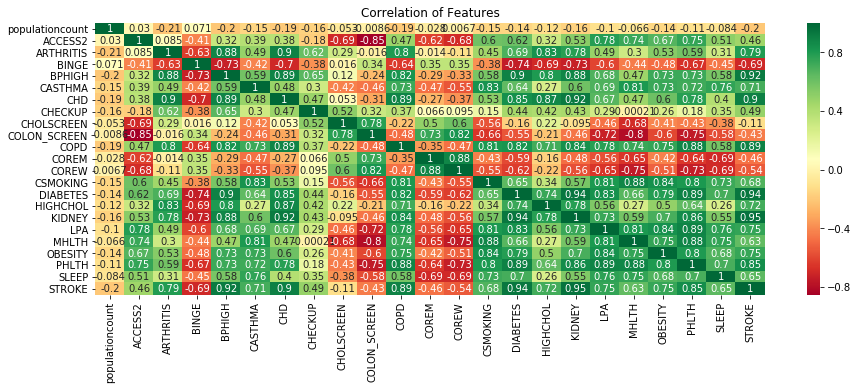

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
sns.heatmap(mainData.drop('CANCER',axis=1).corr(),annot=True, cmap='RdYlGn')
plt.title('Correlation of Features')
plt.show()

In [10]:
#drop correlations not required as of now
mainData.drop(['LPA','COREW','populationcount','CHOLSCREEN', 'ACCESS2', 'CHD', 'PHLTH', 'COLON_SCREEN', 'MHLTH','COPD'],axis=1,inplace=True)

In [11]:
# y is the feature in question (CANCER)
# X is the other features in question

y = mainData['CANCER']
X = mainData.drop('CANCER',axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.25)

In [12]:
#check for any missing/abnormal data
summaryofmainData = sm.OLS(ytrain,Xtrain).fit()
abnormalData = summaryofmainData.resid[summaryofmainData.resid <= -.10]

In [13]:
#find the summary of abnormal data in the dataset
a = np.empty(len(Xtrain.index.values),dtype=np.bool)
for i,j in enumerate(Xtrain.index.values):
    a[i] = True if j in abnormalData.index.values else False
summaryofabnormalData = sm.OLS(ytrain[~a],Xtrain[~a]).fit()

In [14]:
#Obtain Coefficient confidence intervals
alp = .05
confidenceinterval = summaryofabnormalData.conf_int(alpha=alp)
confidenceinterval.columns =['low','high']
confidenceinterval.sort_values('low',ascending=False)

,low,high
KIDNEY,0.768711,0.827950
STROKE,0.224892,0.265090
ARTHRITIS,0.161266,0.167357
HIGHCHOL,0.109807,0.114476
BPHIGH,0.075061,0.081961
CHECKUP,0.035020,0.038161
BINGE,0.016291,0.020500
COREM,-0.020204,-0.016895
OBESITY,-0.046424,-0.042616
SLEEP,-0.047475,-0.043273


In [15]:
## R2 scoring for cross_val_score scoring
def scorer(t,X,y):
    t.fit(X,y)
    ypred = t.predict(X)
    return r2_score(y,ypred)


In [16]:
#Set Model for Regression and Print
snf = LinearRegression()

snf.fit(Xtrain[~a],ytrain[~a])

print('Model Accuracy :')
print('Linear Regression R2: {:.4f}'.format(snf.score(Xtrain[~a],ytrain[~a])))
print('Cross Fold Validation: ')
print('Linear Regression Cross Val Score: {}'.format(cross_val_score(snf,Xtrain[~a],ytrain[~a],cv= 20,scoring=scorer)))
pd.DataFrame(snf.coef_,index=Xtrain[~a].columns,columns=['Coefs']).sort_values('Coefs',ascending=False).sort_values('Coefs',ascending=False)

Model Accuracy :
Linear Regression R2: 0.9538
Cross Fold Validation: 
Linear Regression Cross Val Score: [0.95484283 0.95521165 0.9537983  0.95805023 0.95299694 0.95562171
 0.95405173 0.9584763  0.94850069 0.95195636 0.95759879 0.95547733
 0.95863498 0.95756005 0.95359626 0.95566698 0.94845264 0.95689243
 0.95069761 0.95920343]


,Coefs
KIDNEY,0.672316
STROKE,0.285805
ARTHRITIS,0.181186
HIGHCHOL,0.090049
BPHIGH,0.081870
CHECKUP,0.029652
BINGE,0.004371
COREM,-0.028001
OBESITY,-0.042832
SLEEP,-0.053092


In [3]:
data = pd.read_csv('data.csv')
dataDef = pd.read_csv('data_def.csv')
locations = pd.read_csv('locations.csv')


In [4]:
data2 = data.set_index('uniqueid').join(locations.set_index('uniqueid')[['geographiclevel','stateabbr','cityname']]).copy()
data2 = data2[data2['geographiclevel'] == 'Census Tract']
data2 = data2.drop(['Unnamed: 0','datavaluetypeid','geographiclevel'],axis=1).reset_index()

In [5]:
dataMelt = data2.melt(id_vars=['uniqueid','stateabbr','cityname','populationcount'],var_name='measureid')
dataMelt.head()


,uniqueid,stateabbr,cityname,populationcount,measureid,value
0,0107000-01073000100,AL,Birmingham,3042.0,ACCESS2,0.239
1,0107000-01073000300,AL,Birmingham,2735.0,ACCESS2,0.288
2,0107000-01073000400,AL,Birmingham,3338.0,ACCESS2,0.261
3,0107000-01073000500,AL,Birmingham,2864.0,ACCESS2,0.281
4,0107000-01073000700,AL,Birmingham,2577.0,ACCESS2,0.318


In [6]:
filt1 = dataMelt['measureid']=='SLEEP'
filt2 = dataMelt['measureid']=='LPA'
filt3 = dataMelt['measureid']=='OBESITY'
filt4 = dataMelt['measureid']=='CHD'
filtered = dataMelt[(filt1)|(filt2)|(filt3)|(filt4)]
filtered.head()

,uniqueid,stateabbr,cityname,populationcount,measureid,value
190386,0107000-01073000100,AL,Birmingham,3042.0,CHD,0.080
190387,0107000-01073000300,AL,Birmingham,2735.0,CHD,0.082
190388,0107000-01073000400,AL,Birmingham,3338.0,CHD,0.088
190389,0107000-01073000500,AL,Birmingham,2864.0,CHD,0.108
190390,0107000-01073000700,AL,Birmingham,2577.0,CHD,0.119


In [7]:
pivoted = filtered.reset_index().pivot_table('value',['uniqueid','populationcount','stateabbr','cityname'],'measureid')

In [8]:
def regReplicatePlot(x,y,size=100):
    obesity = pivoted['OBESITY']
    lpa = pivoted['LPA']
    slope,intercept = np.polyfit(x,y,1)
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    plt.plot(x,y,marker='.',linestyle='none',alpha=.4)
    xminmax = np.array([x.min(),x.max()])

    for i in range(size):
        #List of temp index
        inds = np.arange(len(x))

        #Random Index Locations
        b_inds = np.random.choice(inds,len(inds))

        #Select x & y lines based on random index
        tx = x[b_inds].values
        ty = y[b_inds].values

        #generate random regression line & plot
        tslope,tint = np.polyfit(tx,ty,1)
        plt.plot(xminmax,xminmax*tslope+tint,color='green',alpha=.2,linewidth=.25)

    #Plot observed regression line
    plt.plot(xminmax,xminmax*slope+intercept,color='red',linewidth=.5)
    return fig

def corr_BS(x,y,size=1):

    reps = np.empty(size)
    inds = np.arange(len(x))
    for i in range(size):

        #Random Index Locations
        tx = np.random.permutation(x)
        reps[i] = stats.pearsonr(tx,y)[0]
        
    return reps

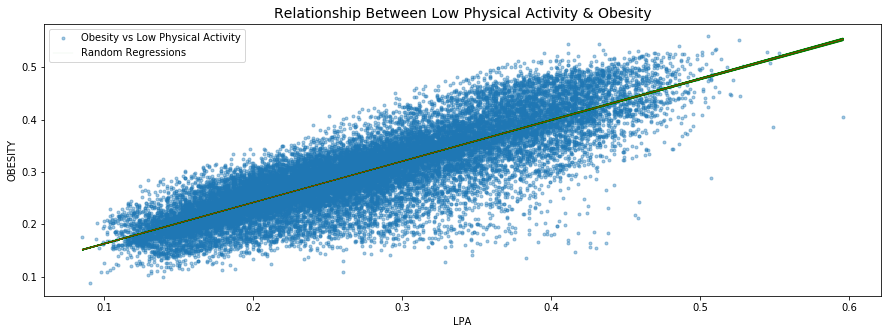

In [11]:
fig = regReplicatePlot(pivoted['LPA'],pivoted['OBESITY'],1000)

#plot labels & title
plt.title('Relationship Between Low Physical Activity & Obesity',fontsize=14)
plt.xlabel('LPA')
plt.ylabel('OBESITY')


plt.legend(['Obesity vs Low Physical Activity','Random Regressions'],)
plt.show()


/Users/yazhinipriyadharshini/anaconda3/envs/cs418env2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


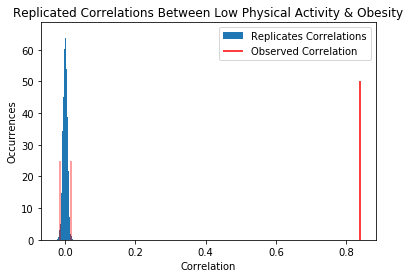

In [14]:
reps = corr_BS(pivoted['LPA'],pivoted['OBESITY'],10000)
orgCorr = stats.pearsonr(pivoted['LPA'],pivoted['OBESITY'])[0]

plt.hist(reps,bins=30,normed=True,label='Replicates Correlations')
plt.vlines(orgCorr,0,50,color='red',label='Observed Correlation')
confInt = np.percentile(reps,[.5,99.5])
plt.vlines(confInt[0],0,25,color='red',alpha=.5)
plt.vlines(confInt[1],0,25,color='red',alpha=.5)
plt.title('Replicated Correlations Between Low Physical Activity & Obesity')
plt.xlabel('Correlation')
plt.ylabel('Occurrences')
plt.legend()
plt.show()
